<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
Brian Janger<br>
Caleb Watson<br>
Matthew Wang<br>
# COMPSCI 371 Homework 0 (Prerequisites)

## Part 1: Algebra and Multivariate Calculus

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import math


def f(x):
    return x[0] ** 3 + x[1] ** 3 + 3. * x[0] * x[1] ** 2 - 15. * x[0] - 15. * x[1]

In [2]:
def decorate_axes(x_label=None, y_label=None, fontsize=16):
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    if x_label is not None:
        plt.xlabel(x_label, fontsize=fontsize)
    if y_label is not None:
        plt.ylabel(y_label, fontsize=fontsize)

In [3]:
def draw_contours(fct, x_range=(-3., 3.), y_range=(-3., 3.), levels=20):
    step = 0.01
    x = np.arange(x_range[0], x_range[1], step)
    y = np.arange(y_range[0], y_range[1], step)
    xg, yg = np.meshgrid(x, y)
    zg = fct((xg, yg))
    plt.figure(figsize=(10, 10), tight_layout=True)
    cp = plt.contour(xg, yg, zg, levels=levels)
    plt.clabel(cp, inline=True, fontsize=16)
    decorate_axes()
    plt.show()

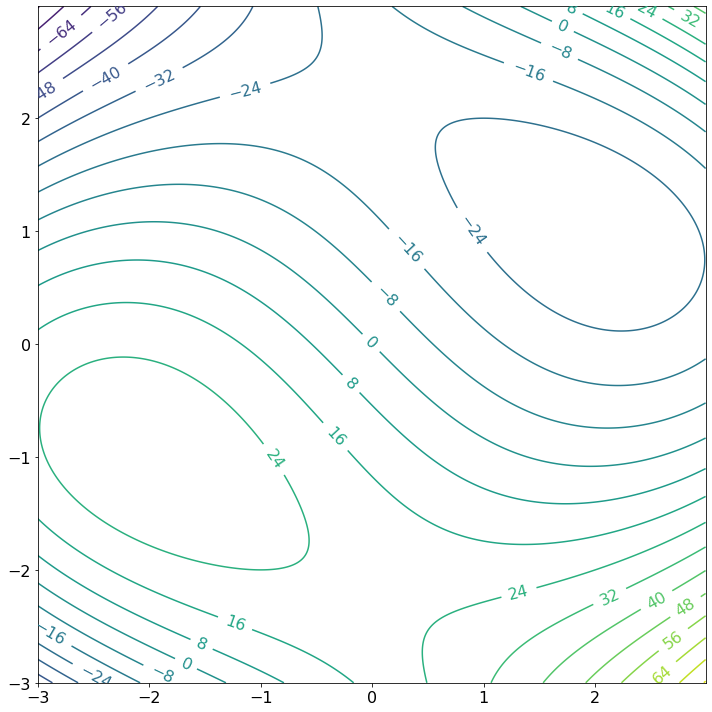

In [4]:
draw_contours(f)

### Problem 1.1
$f_x(x,y) = 3x^2 + 3y^2 - 15$<br>
$f_y(x,y) = 3y^2 + 6xy - 15$

### Problem 1.2
The following system is where we should have zero gradient (i.e. $f_x(x,y)=0, f_y(x,y)=0$):<br>
$3x^2 + 3y^2 = 15$<br>
$3y^2 + 6xy = 15$

There are four critical points listed below which are the solutions to the system of equations:<br>
$(-2,-1)$<br>
$(2,1)$<br>
$(0,\sqrt{5})$<br>
$(0,-\sqrt{5})$<br>

### Problem 1.3
$f_{xx}(x,y) = 6x$<br>
$f_{xy}(x,y) = 6y$<br>
$f_{yy}(x,y) = 6y + 6x$

### Problem 1.4
The Hessian at $(-2,-1)$:<br>
$H_f = \begin{bmatrix}
-12 & -6 \\
-6 & -18
\end{bmatrix}$

The Hessian at $(2,1)$: <br>
$H_f = \begin{bmatrix}
12 & 6 \\
6 & 18
\end{bmatrix}$

The Hessian at $(0,\sqrt{5})$:<br>
$H_f = \begin{bmatrix}
0 & 6\sqrt{5} \\
6\sqrt{5} & 6\sqrt{5}
\end{bmatrix}$

The Hessian at $(0,-\sqrt{5})$:<br>
$H_f = \begin{bmatrix}
0 & -6\sqrt{5} \\
-6\sqrt{5} & -6\sqrt{5}
\end{bmatrix}$

### Problem 1.5

In [5]:
def gradient(fct, x0, delta):
    answer = np.zeros(len(x0))
    ind = 0
    while ind < len(x0):
        x0_low = np.copy(x0)
        x0_low[ind] -= delta
        x0_high = np.copy(x0)
        x0_high[ind] += delta
        answer[ind] = (fct(x0_high)-fct(x0_low))/(2.*delta)
        ind += 1
    return answer

In [6]:
def hessian(fct, x0, delta):
    hess = []
    for i in range(0,len(x0)):
        upper = list(x0)
        lower = list(x0)
        upper[i] += delta
        lower[i] -= delta
        partial_upper = gradient(fct, upper, delta)
        partial_lower = gradient(fct, lower, delta)
        
        hess_temp = (partial_upper - partial_lower) / (2*delta)
        hess.append(hess_temp)
        
    return np.array(hess)
    

In [7]:
np.around(hessian(f, (-2,-1), 1.e-5), decimals=3)

array([[-12.,  -6.],
       [ -6., -18.]])

In [8]:
np.around(hessian(f, (2,1), 1.e-5), decimals = 3)

array([[12.,  6.],
       [ 6., 18.]])

In [9]:
np.around(hessian(f, (0,np.sqrt(5)), 1.e-5), decimals = 3)

array([[-0.   , 13.416],
       [13.416, 13.416]])

In [10]:
np.around(hessian(f, (0,-np.sqrt(5)), 1.e-5), decimals=3)

array([[  0.   , -13.416],
       [-13.416, -13.416]])

### Problem 1.6
**For the Hessian at $\mathbf{(-2,-1)}$:** <br>
    
We find $\lambda = -15 - 3\sqrt{5}, -15 + 3\sqrt{5}$.
Since all eigenvalues of the Hessian are negative, we can declare the Hessian to be negative definite. Therefore, the point $(-2,-1)$ is a **local maximum**.

**For the Hessian at $\mathbf{(2,1)}$:** <br>
    
We find $\lambda = 15 - 3\sqrt{5}, 15 + 3\sqrt{5}$.
Since all eigenvalues of the Hessian are positive, we can declare the Hessian to be positive definite. Therefore, the point $(2,1)$ is a **local minimum**.

**For the Hessian at $\mathbf{(0,\sqrt{5})}$:** <br>
    
We find $\lambda = -15 + 3\sqrt{5}, 15 + 3\sqrt{5}$.
Since the Hessian has one positive and one negative eigenvalue, we cannot declare the matrix to be positive definite or negative definite, the criterion for a local minimum and local maximum, respectively. Therefore, $(0,\sqrt{5})$ must be a **saddle point**.

**For the Hessian at $\mathbf{(0,-\sqrt{5})}$:** <br>
    
We find $\lambda = -15 - 3\sqrt{5}, 15 - 3\sqrt{5}$.
Since the Hessian has one positive and one negative eigenvalue, we cannot declare the matrix to be positive definite or negative definite, the criterion for a local minimum and local maximum, respectively. Therefore, $(0,-\sqrt{5})$ must be a **saddle point**.

### Problem 1.7
Here are the properties for each of the different local extrema, in terms of eigenvalues:

$$\textbf{Local Maximum:} \lambda_1 < 0, \lambda_2 < 0$$
$$\textbf{Local Minimum:} \lambda_1 > 0, \lambda_2 > 0$$
$$\textbf{Saddle Point:} \lambda_1 > 0, \lambda_2 < 0 \textbf{   OR   } \lambda_1 < 0, \lambda_2 > 0$$

Using these rules and our given eigenvalues $\lambda_1=2,\lambda_2=0$, we can see that the eigenvalues alone are not enough to determine the type of critical point $(0,0)$ is in this situation, because one of the eigenvalues is zero (causing us to not be able to select one of the types of local extrema).

Another way we could determine the type of critical point is by calculating the gradient at points around $(0,0)$.

$$g_x(x,y) = 2x$$
$$g_y(x,y) = 3y^2$$

At the point $(0,1)$, $\nabla g = \begin{bmatrix}0\\3\end{bmatrix}$. <br>
At the point $(0,-1)$, $\nabla g = \begin{bmatrix}0\\3\end{bmatrix}$.

The gradient is positive on opposite sides of the origin at $(0,1)$ and $(0,-1)$. This means that as $y$ increases from $-1$ to $0$, $g(x,y)$ continues to increase, and as $y$ increases from $0$ to $1$, $g(x,y)$ will still keep increasing (with zero gradient at $(0,0)$). Thus, we can declare $(0,0)$ to be a saddle point because logistically no local maximum or minimum can be reached.

### Problem 1.8

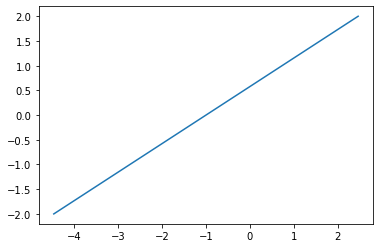

In [11]:
import math
alphas = np.linspace(-4,4,300)
x = -1 + alphas * math.sqrt(3)/2
y = alphas / 2
plt.plot(x,y)

The objective is to plot the restriction line $l$ with the given properties. Firstly, we calculate the unit vector 30 degrees counterclockwise from the x-axis. Precisely, this unit vector is $(\cos{(30)},\sin{(30)})$, or $(\frac{\sqrt{3}}{2}, \frac{1}{2})$.

From here, we get our shifted values with the function $(-1,0) + \alpha * (\frac{\sqrt{3}}{2}, \frac{1}{2})$, where $\alpha$ is the range $[-4,4]$. 

## Part 2: Probability

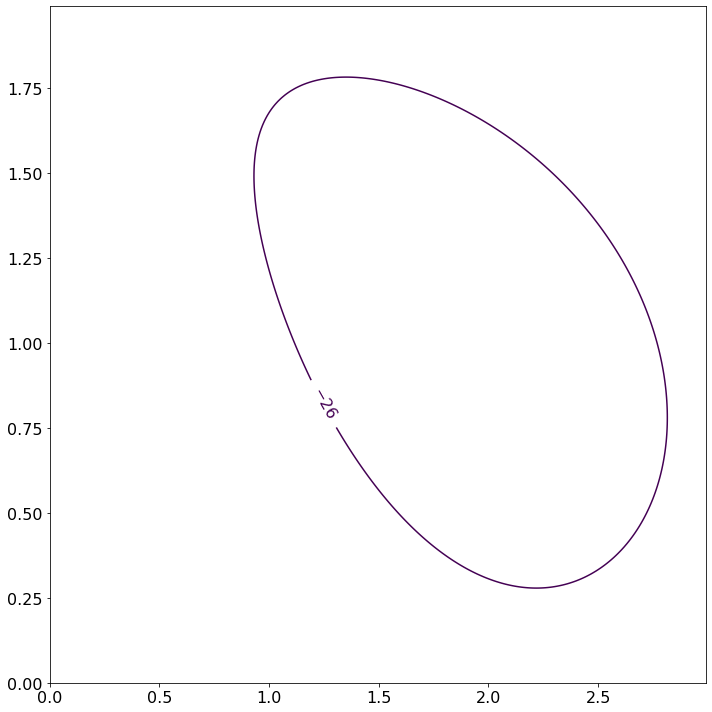

In [12]:
draw_contours(f, x_range=(0.,3),y_range=(0.,2.),levels=(-26,))

### Problem 2.1

The probability $p$ that the point will fall inside region $A$, is the area of the bean-shaped region $A$ divided by the total area of the rectangle of region $R$, or $a/r$.

$p = \frac{a}{r}$

### Problem 2.2

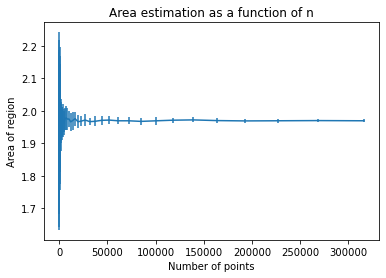

In [13]:
rng = np.random.default_rng()

# function to plot results
def plot_results(x, y, err):
    plt.figure()
    plt.errorbar(x, y, yerr=err)
    plt.xlabel("Number of points")
    plt.ylabel("Area of region")
    plt.title("Area estimation as a function of n")
    
def calculate_summary(ns, reps, x_min, x_max, y_min, y_max, area):
    # area < -26 (established local min in previous question)
    # traversing through increasing values of n points 
    mean = []
    sd = []
    for n in ns:
        x, y = rng.random((n, reps)), rng.random((n, reps))
        # scaling and shifting for given dimensions
        xf = x_min + (x*x_max) 
        yf = y_min + (y*y_max)
        combine = np.stack((xf, yf), axis=0)
        values = f(combine)
       
        num = (values < area).sum(axis=0) # sum across all columns (total of reps times)
        probability = num/n
        
        mean = np.append(mean, np.mean(np.multiply(probability, 6)))
        sd = np.append(sd, np.std(np.multiply(probability, 6)))

    return mean, sd

logspace = np.logspace(2, 5.5, 50, dtype=int)
values = calculate_summary(logspace, 30, 0, 3, 0, 2, -26)
plot_results(logspace, values[0], values[1])

### Problem 2.3

We used a binomial distribution because a point can fall in two categories, in $a$ or not in $a$

**Theoretical probability distribution:**

$p_n(k) = \binom{n}{k} (\frac{a}{r})^k(1-\frac{a}{r})^{n-k}$

This follows the standard binomial probability distribution of $p_n(k) = \binom{n}{k} p^kq^{n-k}$, where $p$, the probability of selecting a point inside the region $A$, is $\frac{a}{r}$, and $q = 1-p = 1-\frac{a}{r}$.

### Problem 2.4

**Theoretical mean of random variable $k$:**

$m_k(n) = n * a/r$

**Theoretical standard deviation of random variable $k$:**

$\sigma_k(n) = \sqrt{n(a/r)(1-a/r)}$

**Theoretical mean of random variable $a$:**

$m_a(n)=a$

**Theoretical standard deviation of random variable $a$:**

$\sigma_a(n) = r/n * \sigma_k(n) = \sqrt{r*a/n(1-a/r)}$

Given the random sampling of $x$ and $y$ coordinates for the function $f$, we may say that our process for calculating $a$ is unbiased as values of $n$ increase logarithmically. It is important that we are aware of the dimensions of the area $r$, in order to perform proper scaling and shifting that ensures equal likelihood of all points between chosen. To reduce bias, an adequate number of random samples is required. As is shown in the graph in Problem 2.2, as $n$ increases, the estimated area value converges to the true value with minimal deviation from the mean. 

### Problem 2.5

Mean approximation of a: 1.968


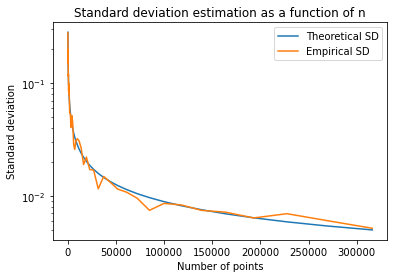

In [14]:
logspace = np.logspace(2, 5.5, 50, dtype=int)

# collecting mean values for theoretical calculation
mean = calculate_summary(logspace, 30, 0, 3, 0, 2, -26)[0]

# collecting empirical standard deviation results
sd = calculate_summary(logspace, 30, 0, 3, 0, 2, -26)[1]

# calculating theoretical standard deviation
sd_theo = []
for n in logspace:
    sd_theo.append(np.sqrt(6*(mean[-1]/n)*(1-(mean[-1]/6))))

def plot_log(x, y_theoretical, y_empirical):
    plt.figure()
    plt.semilogy(x, y_theoretical, label = "Theoretical SD")
    plt.semilogy(x, y_empirical, label = "Empirical SD")
    plt.xlabel("Number of points")
    plt.ylabel("Standard deviation")
    plt.title("Standard deviation estimation as a function of n")
    plt.legend()

# plotting curves and printing approximate value of a
plot_log(logspace, sd_theo, sd)
print("Mean approximation of a: %.3f" % mean[-1])